### Python Imports

In [1]:
import pandas as pd

import io
import requests

import numpy as np
import matplotlib.pyplot as plt

import glob

pd.set_option("display.max_columns", 100)

### Helper Functions

In [2]:
def sort_by_total(df):
    df['total'] = df.sum(axis=1)
    df.sort_values(by='total',ascending=False,inplace=True)
    df.drop('total', axis=1, inplace=True)
    return df

# Viz 1 - Hydropower Projects Over Time

Charts showing:
* Symbol Map of Planned Hydropower Projects Over Time
* Bar Chart Showing Total Hydro Capacity Over Time

## Data Sources

#### Hydropower 

DICA - by country by year
- [IFC Hydropower Resources in Myanmar Page](https://www.ifc.org/wps/wcm/connect/industry_ext_content/ifc_external_corporate_site/hydro+advisory/resources/sea+of+the+hydropower+sector+in+myanmar+resources+page)
- [Hydropower Database in XLSX](https://www.ifc.org/wps/wcm/connect/07b1eba5-9c63-4f7c-8674-d463732a0395/Copy+of+18+02+07+MYA+SEA+HP+Database+WB-IFC.xlsx?MOD=AJPERES)




## Cleaned Data


In [3]:
# hydro_df = pd.read_excel(\
#     "https://www.ifc.org/wps/wcm/connect/07b1eba5-9c63-4f7c-8674-d463732a0395/Copy+of+18+02+07+MYA+SEA+HP+Database+WB-IFC.xlsx?MOD=AJPERES", \
#                         skiprows=[0])

hydro_df = pd.read_excel(\
    "../../data/hydropower/Copy+of+18+02+07+MYA+SEA+HP+Database+WB-IFC.xlsx", \
                        skiprows=[0])

In [4]:
hydro_df.head()

,ID,Hydropower Plant,Status,Status 2,LAT N,LON E,State/Region,District,Township,Village,Basin,Sub-Basin (HP Chapter),Sub-Basin (GIS Maps),River/ Watershed,Unnamed: 14,HP or Multipurpose,D/S Distance to irrigation extraction if not from dam (km),Unnamed: 17,Catchment Area (km2),Catchment Annual rainfall (mm),GIS Rainfall,Mean annual inflow (MAF) into reservoir (m3/s),Annual Runnof into Reservoir (hm3),Unit flow l/s/km2,Qmin/ MAF,Unnamed: 25,Dam Type,Dam Height (m),Full Supply Level (FSL) (m),Low Water Level (LWL) (m),Drawdown (m),Unnamed: 31,Reservoir Area (km2),Total Length of reservoir (km),Reservoir Dead Storage (hm3),Reservoir Live Storage (hm3),Reservoir Total Storage (hm3),Reservoir Retention period (days),RoR or Storage,Unnamed: 39,Distance along river between dam and powerhouse (km),Powerhouse Type,Total Powerplant Design Discharge (m3/s),Turbine discharge/ Min Flow,Turbine Design Head (m),Number of units,Installed Capacity (MW),Annual Generation (GWh),Firm Power (MW),Plant Factor,Unnamed: 50,Transmission Line Voltage level (kV),TL Length (km),TL Connected to S/S,Unnamed: 54,Acces Road Length (km),Unnamed: 56,Developer,Country,Investment by,Installed Capacity (MW).1,Myanmar Selfuse (MW),% use MYA,Export (MW),Export to,Unnamed: 65,Estimated No. Construction Workers (planned projects),Unnamed: 67,Actual Commissioning Year,MoEE Planned Comissioning Year,Unnamed: 70,Unnamed: 71,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
0,2,Baluchaung 1,Built,E,19.648000,97.287000,Kayah,Loikaw,Loikaw,NaN,Thanlwin,Nam Pawn,Baluchaung,Baluchaung,NaN,HP,NaN,NaN,7872.0,NaN,1493.0,36.494709,1150.897135,4.636015,0.813817,NaN,CG,11.0,867.0,864.0,3.0,NaN,0.004,0.2,0.00,2.07,2.07,0.656488,RoR,NaN,10.33,Above ground,46.20000,1.55556,69.845,2.0,28.0,200.0,26.0,0.815395,NaN,132,5.313,Baluchaung 2,NaN,NaN,NaN,MoEE,Myanmar,Sole Investment,28.0,28.0,1.0,0.0,NaN,NaN,NaN,NaN,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Baluchaung 2,Built,E,19.557000,97.358000,Kayah,Loikaw,Loikaw,NaN,Thanlwin,Nam Pawn,Baluchaung,Baluchaung,NaN,HP,NaN,NaN,7910.0,NaN,1493.0,38.000000,1198.368000,4.804046,0.786842,NaN,Weir,0.0,787.0,784.0,3.0,NaN,0.000,0.0,0.00,0.00,0.00,0,RoR,NaN,7.06,Above ground,47.66160,1.59403,421.952,2.0,168.0,1190.0,155.0,0.8086,NaN,230,153.79+193.2,Taungoo and Shwemyo,NaN,NaN,NaN,MoEE,Myanmar,Sole Investment,168.0,168.0,1.0,0.0,NaN,NaN,NaN,NaN,1974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,Baluchaung 3,Built,E,19.546000,97.397000,Kayah,Loikaw,Loikaw,NaN,Thanlwin,Nam Pawn,Baluchaung,Baluchaung,NaN,HP,NaN,NaN,8042.0,NaN,1493.0,40.200000,1267.747200,4.998757,0.746269,NaN,Intake,0.0,339.0,NaN,NaN,NaN,0.000,0.0,0.00,0.00,0.00,0,RoR,NaN,5.08,Above ground,51.00000,1.7,114.000,6.0,52.0,334.0,NaN,0.733228,NaN,132,4.67,Baluchaung 3,NaN,NaN,NaN,Future Energy,Myanmar,Local BOT,52.0,52.0,1.0,0.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,Baluchaung (upper),Construction,C,20.484592,96.781918,Shan,Taunggyi,Pin Laung,Indein,Thanlwin,Nam Pawn,Baluchaung,Baluchaung,NaN,HP,NaN,NaN,356.0,1925.0,1493.0,11.060000,348.788160,31.067416,0.433092,NaN,NaN,35.0,1140.0,1125.0,15.0,NaN,9.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,Above ground,16.02905,3.34636,147.980,2.0,30.0,90.1,3.2,0.342846,NaN,66,32,Kalaw,NaN,NaN,NaN,NeoEnergy Oasis,Myanmar,Local BOT,30.0,30.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,NaN,7.25,6.16,5.2,4.79,5.89,9.8,13.18,20.69,21.69,16.41,12.41,8.95
4,8,Bawgata,LocMoU,P,18.255561,96.848496,Bago,Taungoo,Kyauk Gyi,NaN,Sittaung,Bawgata,Bawgata,Bawgata,NaN,HP,NaN,NaN,260.0,NaN,2806.0,9.500000,299.592000,36.538462,0.094737,NaN,Rockfill,79.9,NaN,NaN,NaN,NaN,19.430,NaN,556.67,278.33,835.00,339.096,S,NaN,0.00,NaN,NaN,NaN,NaN,NaN,160.0,500.0,NaN,0.356735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thoolei,Myanmar,Local BOT,160.0,160.0,1.0,0.0,NaN,NaN,700.0,NaN,NaN,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
hydro_df["Year_Simplified"] = hydro_df[['MoEE Planned Comissioning Year','Actual Commissioning Year']].bfill(1).iloc[:,0]


In [6]:
hydro_df.head()

,ID,Hydropower Plant,Status,Status 2,LAT N,LON E,State/Region,District,Township,Village,Basin,Sub-Basin (HP Chapter),Sub-Basin (GIS Maps),River/ Watershed,Unnamed: 14,HP or Multipurpose,D/S Distance to irrigation extraction if not from dam (km),Unnamed: 17,Catchment Area (km2),Catchment Annual rainfall (mm),GIS Rainfall,Mean annual inflow (MAF) into reservoir (m3/s),Annual Runnof into Reservoir (hm3),Unit flow l/s/km2,Qmin/ MAF,Unnamed: 25,Dam Type,Dam Height (m),Full Supply Level (FSL) (m),Low Water Level (LWL) (m),Drawdown (m),Unnamed: 31,Reservoir Area (km2),Total Length of reservoir (km),Reservoir Dead Storage (hm3),Reservoir Live Storage (hm3),Reservoir Total Storage (hm3),Reservoir Retention period (days),RoR or Storage,Unnamed: 39,Distance along river between dam and powerhouse (km),Powerhouse Type,Total Powerplant Design Discharge (m3/s),Turbine discharge/ Min Flow,Turbine Design Head (m),Number of units,Installed Capacity (MW),Annual Generation (GWh),Firm Power (MW),Plant Factor,Unnamed: 50,Transmission Line Voltage level (kV),TL Length (km),TL Connected to S/S,Unnamed: 54,Acces Road Length (km),Unnamed: 56,Developer,Country,Investment by,Installed Capacity (MW).1,Myanmar Selfuse (MW),% use MYA,Export (MW),Export to,Unnamed: 65,Estimated No. Construction Workers (planned projects),Unnamed: 67,Actual Commissioning Year,MoEE Planned Comissioning Year,Unnamed: 70,Unnamed: 71,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Year_Simplified
0,2,Baluchaung 1,Built,E,19.648000,97.287000,Kayah,Loikaw,Loikaw,NaN,Thanlwin,Nam Pawn,Baluchaung,Baluchaung,NaN,HP,NaN,NaN,7872.0,NaN,1493.0,36.494709,1150.897135,4.636015,0.813817,NaN,CG,11.0,867.0,864.0,3.0,NaN,0.004,0.2,0.00,2.07,2.07,0.656488,RoR,NaN,10.33,Above ground,46.20000,1.55556,69.845,2.0,28.0,200.0,26.0,0.815395,NaN,132,5.313,Baluchaung 2,NaN,NaN,NaN,MoEE,Myanmar,Sole Investment,28.0,28.0,1.0,0.0,NaN,NaN,NaN,NaN,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992.0
1,4,Baluchaung 2,Built,E,19.557000,97.358000,Kayah,Loikaw,Loikaw,NaN,Thanlwin,Nam Pawn,Baluchaung,Baluchaung,NaN,HP,NaN,NaN,7910.0,NaN,1493.0,38.000000,1198.368000,4.804046,0.786842,NaN,Weir,0.0,787.0,784.0,3.0,NaN,0.000,0.0,0.00,0.00,0.00,0,RoR,NaN,7.06,Above ground,47.66160,1.59403,421.952,2.0,168.0,1190.0,155.0,0.8086,NaN,230,153.79+193.2,Taungoo and Shwemyo,NaN,NaN,NaN,MoEE,Myanmar,Sole Investment,168.0,168.0,1.0,0.0,NaN,NaN,NaN,NaN,1974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1974.0
2,6,Baluchaung 3,Built,E,19.546000,97.397000,Kayah,Loikaw,Loikaw,NaN,Thanlwin,Nam Pawn,Baluchaung,Baluchaung,NaN,HP,NaN,NaN,8042.0,NaN,1493.0,40.200000,1267.747200,4.998757,0.746269,NaN,Intake,0.0,339.0,NaN,NaN,NaN,0.000,0.0,0.00,0.00,0.00,0,RoR,NaN,5.08,Above ground,51.00000,1.7,114.000,6.0,52.0,334.0,NaN,0.733228,NaN,132,4.67,Baluchaung 3,NaN,NaN,NaN,Future Energy,Myanmar,Local BOT,52.0,52.0,1.0,0.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0
3,7,Baluchaung (upper),Construction,C,20.484592,96.781918,Shan,Taunggyi,Pin Laung,Indein,Thanlwin,Nam Pawn,Baluchaung,Baluchaung,NaN,HP,NaN,NaN,356.0,1925.0,1493.0,11.060000,348.788160,31.067416,0.433092,NaN,NaN,35.0,1140.0,1125.0,15.0,NaN,9.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,Above ground,16.02905,3.34636,147.980,2.0,30.0,90.1,3.2,0.342846,NaN,66,32,Kalaw,NaN,NaN,NaN,NeoEnergy Oasis,Myanmar,Local BOT,30.0,30.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,NaN,7.25,6.16,5.2,4.79,5.89,9.8,13.18,20.69,21.69,16.41,12.41,8.95,2019.0
4,8,Bawgata,LocMoU,P,18.255561,96.848496,Bago,Taungoo,Kyauk Gyi,NaN,Sittaung,Bawgata,Bawgata,Bawgata,NaN,HP,NaN,NaN,260.0,NaN,2806.0,9.500000,299.592000,36.538462,0.094737,NaN,Rockfill,79.9,NaN,NaN,NaN,NaN,19.430,NaN,556.67,278.33,835.00,339.096,S,NaN,0.00,NaN,NaN,NaN,NaN,NaN,160.0,500.0,NaN,0.356735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thoolei,Myanmar,Local BOT,160.0,160.0,1.0,0.0,NaN,NaN,700.0,NaN,NaN,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0


In [7]:
hydro_capacity_by_year = pd.DataFrame.pivot_table(hydro_df, columns=['Year_Simplified'],
                      aggfunc='sum', fill_value=None, margins=False, values=['Installed Capacity (MW)'],
                      dropna=True, margins_name='All').transpose().reset_index()
hydro_capacity_by_year['Year_Simplified'].astype(int,inplace=True)
hydro_capacity_by_year.set_index('Year_Simplified',inplace=True)

In [8]:
hydro_capacity_by_year.head()

,Installed Capacity (MW)
Year_Simplified,
1974.0,168.0
1989.0,25.0
1990.0,56.0
1992.0,28.0
1995.0,18.0


In [9]:
hydro_dam_locations_export_df = hydro_df[['Hydropower Plant', 'Status', 'LAT N', 'LON E',  \
                                          'State/Region','District','Township','Village', \
                                          'Basin', 'Sub-Basin (HP Chapter)', 'Sub-Basin (GIS Maps)', 'River/ Watershed', \
                                          'Developer', 'Country', 'Investment by', \
                                          'Installed Capacity (MW)', 'Myanmar Selfuse (MW)', \
                                          'Export (MW)', 'Export to', \
                                          'Estimated No. Construction Workers (planned projects)', \
                                          'Year_Simplified'
                                         ]]

In [10]:
hydro_dam_locations_export_df.head()

,Hydropower Plant,Status,LAT N,LON E,State/Region,District,Township,Village,Basin,Sub-Basin (HP Chapter),Sub-Basin (GIS Maps),River/ Watershed,Developer,Country,Investment by,Installed Capacity (MW),Myanmar Selfuse (MW),Export (MW),Export to,Estimated No. Construction Workers (planned projects),Year_Simplified
0,Baluchaung 1,Built,19.648000,97.287000,Kayah,Loikaw,Loikaw,NaN,Thanlwin,Nam Pawn,Baluchaung,Baluchaung,MoEE,Myanmar,Sole Investment,28.0,28.0,0.0,NaN,NaN,1992.0
1,Baluchaung 2,Built,19.557000,97.358000,Kayah,Loikaw,Loikaw,NaN,Thanlwin,Nam Pawn,Baluchaung,Baluchaung,MoEE,Myanmar,Sole Investment,168.0,168.0,0.0,NaN,NaN,1974.0
2,Baluchaung 3,Built,19.546000,97.397000,Kayah,Loikaw,Loikaw,NaN,Thanlwin,Nam Pawn,Baluchaung,Baluchaung,Future Energy,Myanmar,Local BOT,52.0,52.0,0.0,NaN,NaN,2014.0
3,Baluchaung (upper),Construction,20.484592,96.781918,Shan,Taunggyi,Pin Laung,Indein,Thanlwin,Nam Pawn,Baluchaung,Baluchaung,NeoEnergy Oasis,Myanmar,Local BOT,30.0,30.0,0.0,NaN,NaN,2019.0
4,Bawgata,LocMoU,18.255561,96.848496,Bago,Taungoo,Kyauk Gyi,NaN,Sittaung,Bawgata,Bawgata,Bawgata,Thoolei,Myanmar,Local BOT,160.0,160.0,0.0,NaN,700.0,2020.0


In [11]:
hydro_dam_locations_export_df.to_csv("../../data/hydropower/hydro_dam_locations_export.csv")



# Viz 2 - Trade flows and the reliance on extractives

Charts showing:
* Stream graph of exports over time by country

## Data Sources

#### Trade flows

Comtrade
- [Homepage for downloading data](https://comtrade.un.org/data/)
- Downloaded them in parts because can only get 5 years at a time (exports reported from MM and imports reported from others)
    - [comtrade_exports_from_MM_2009-2013.csv](../../data/trade/comtrade/comtrade_exports_from_MM_2009-2013.csv)
    - [comtrade_exports_from_MM_2014-2019.csv](../../data/trade/comtrade/comtrade_exports_from_MM_2014-2018.csv)
    - [comtrade_imports_from_MM_2009-2013.csv](../../data/trade/comtrade/comtrade_imports_from_MM_2009-2013.csv)
    - [comtrade_imports_from_MM_2014-2019.csv](../../data/trade/comtrade/comtrade_imports_from_MM_2014-2018.csv)



## Cleaned Data

In [12]:
comtrade_df_mm_ex_09_13 = pd.read_csv(\
                    "../../data/trade/comtrade/comtrade_exports_from_MM_2009-2013.csv")

comtrade_df_mm_ex_14_18 = pd.read_csv(\
                    "../../data/trade/comtrade/comtrade_exports_from_MM_2014-2018.csv")

comtrade_df_mm_im_09_13 = pd.read_csv(\
                    "../../data/trade/comtrade/comtrade_imports_from_MM_2009-2013.csv")

comtrade_df_mm_im_14_18 = pd.read_csv(\
                    "../../data/trade/comtrade/comtrade_imports_from_MM_2014-2018.csv")

In [13]:
comtrade_df = comtrade_df_mm_ex_09_13 \
    .append(comtrade_df_mm_ex_14_18) \
    .append(comtrade_df_mm_im_09_13) \
    .append(comtrade_df_mm_im_14_18) \

In [14]:
comtrade_df.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,2nd Partner Code,2nd Partner,2nd Partner ISO,Customs Proc. Code,Customs,Mode of Transport Code,Mode of Transport,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2012,2012,2012,2,0,2,Export,104,Myanmar,MMR,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Animals; live,1,No Quantity,NaN,NaN,NaN,NaN,NaN,NaN,131904,NaN,NaN,0
1,H4,2012,2012,2012,2,0,2,Export,104,Myanmar,MMR,156,China,CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Animals; live,1,No Quantity,NaN,NaN,NaN,NaN,NaN,NaN,131904,NaN,NaN,0
2,H4,2013,2013,2013,2,0,2,Export,104,Myanmar,MMR,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Animals; live,1,No Quantity,NaN,NaN,NaN,NaN,NaN,NaN,876252,NaN,NaN,0
3,H4,2013,2013,2013,2,0,2,Export,104,Myanmar,MMR,156,China,CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Animals; live,1,No Quantity,NaN,NaN,NaN,NaN,NaN,NaN,876252,NaN,NaN,0
4,H4,2012,2012,2012,2,0,2,Export,104,Myanmar,MMR,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Meat and edible meat offal,1,No Quantity,NaN,NaN,NaN,NaN,NaN,NaN,5465519,NaN,NaN,0


In [15]:
country_region_iso_lookup = pd.read_csv(\
                    "../../data/country_region_iso/country_region_iso_lookup.csv")

In [16]:
country_region_iso_lookup_dict = {}

In [17]:
for i,row in country_region_iso_lookup.iterrows():
    country_region_iso_lookup_dict[row['alpha-3']] = row['sub-region']
country_region_iso_lookup_dict['WLD'] = 'N/A'

In [18]:
sub_region = []

In [19]:
for i,row in comtrade_df.iterrows():
    if row['Trade Flow'] == 'Import':
        sub_region.append(country_region_iso_lookup_dict[row['Reporter ISO']])
    else:
        sub_region.append(country_region_iso_lookup_dict[row['Partner ISO']])

In [20]:
comtrade_df["Region"] = sub_region

In [21]:
country = []

In [22]:
for i,row in comtrade_df.iterrows():
    if row['Trade Flow'] == 'Import':
        country.append(row['Reporter'])
    else:
        country.append(row['Partner'])

In [23]:
comtrade_df["Country"] = country

In [24]:
extractives_lookup = {
"Aircraft, spacecraft and parts thereof": "Non Extractives",
"Aircraft, spacecraft, and parts thereof": "Non Extractives",
"Albuminoidal substances; modified starches; glues; enzymes": "Non Extractives",
"Aluminium and articles thereof": "Extractives",
"Aluminum and articles thereof": "Extractives",
"Animal or vegetable fats and oils": "Non Extractives",
"Animal or vegetable fats and oils and their cleavage products; prepared animal fats; animal or vegetable waxes": "Non Extractives",
"Animal or vegetable fats and oils and their cleavage products; prepared edible fats; animal or vegetable waxes": "Non Extractives",
"Animal originated products; not elsewhere specified or included": "Non Extractives",
"Animals; live": "Non Extractives",
"Apparel and clothing accessories; knitted or crocheted": "Non Extractives",
"Apparel and clothing accessories; not knitted or crocheted": "Non Extractives",
"Arms and ammunition; parts and accessories thereof": "Non Extractives",
"Articles of apparel and clothing accessories, knitted or crocheted": "Non Extractives",
"Articles of apparel and clothing accessories, not knitted or crocheted": "Non Extractives",
"Articles of iron or steel": "Extractives",
"Articles of leather; saddlery and harness": "Non Extractives",
"Articles of leather; saddlery and harness; travel goods, handbags and similar containers; articles of animal gut (other than silk-worm gut)": "Non Extractives",
"Beverages, spirits and vinegar": "Non Extractives",
"Carpets and other textile floor coverings": "Non Extractives",
"Ceramic products": "Non Extractives",
"Cereals": "Non Extractives",
"Chemical products n.e.c.": "Non Extractives",
"Clocks and watches and parts thereof": "Non Extractives",
"Cocoa and cocoa preparations": "Non Extractives",
"Coffee, tea, mate and spices": "Non Extractives",
"Coffee, tea, maté and spices": "Non Extractives",
"Commodities not specified according to kind": "Non Extractives",
"Copper and articles thereof": "Extractives",
"Cork and articles of cork": "Non Extractives",
"Cotton": "Non Extractives",
"Dairy produce; birds' eggs; natural honey; edible products of animal origin, not elsewhere specified or included": "Non Extractives",
"Edible fruit and nuts; peel of citrus fruit or melons": "Non Extractives",
"Edible vegetables and certain roots and tubers": "Non Extractives",
"Electrical machinery and equipment and parts thereof; sound recorders and r ...": "Non Extractives",
"Electrical machinery and equipment and parts thereof; sound recorders and reproducers, television image and sound recorders and reproducers, and parts and accessories of such articles": "Non Extractives",
"Electrical machinery and equipment and parts thereof; sound recorders and reproducers; television image and sound recorders and reproducers, parts and accessories of such articles": "Non Extractives",
"Essential oils and resinoids; perfumery, cosmetic or toilet preparations": "Non Extractives",
"Explosives; pyrotechnic products; matches; pyrophoric alloys; certain combustible preparations": "Non Extractives",
"Fabrics; knitted or crocheted": "Non Extractives",
"Fabrics; special woven fabrics, tufted textile fabrics, lace, tapestries, trimmings, embroidery": "Non Extractives",
"Feathers and down, prepared; and articles made of feather or of down; artificial flowers; articles of human hair": "Non Extractives",
"Fertilizers": "Non Extractives",
"Fish and crustaceans, molluscs and other acquatic invertebrates": "Non Extractives",
"Fish and crustaceans, molluscs and other aquatic invertebrates": "Non Extractives",
"Food industries, residues and wastes thereof; prepared animal fodder": "Non Extractives",
"Footwear, gaiters and the like; parts of such articles": "Non Extractives",
"Footwear; gaiters and the like; parts of such articles": "Non Extractives",
"Fruit and nuts, edible; peel of citrus fruit or melons": "Non Extractives",
"Furniture; bedding, mattresses, cushions and similar stuffed furnishing": "Non Extractives",
"Furniture; bedding, mattresses, mattress supports, cushions and similar stuffed furnishings; lamps and lighting fittings, n.e.c.; illuminated signs, illuminated name-plates and the like; prefabricated buildings": "Non Extractives",
"Furniture; bedding, mattresses, mattress supports, cushions and similar stuffed furnishings; lamps and lighting fittings, not elsewhere specified or included; illuminated signs, illuminated name-plates and the like; prefabricated buildings": "Non Extractives",
"Furskins and artificial fur; manufactures thereof": "Non Extractives",
"Glass and glassware": "Non Extractives",
"Headgear and parts thereof": "Non Extractives",
"Impregnated, coated, covered or laminated textile fabrics": "Non Extractives",
"Inorganic chemicals; organic and inorganic compounds of precious metals; of rare earth metals, of radio-active elements and of isotopes": "Non Extractives",
"Inorganic chemicals; organic or inorganic compounds of precious metals, of rare-earth metals, of radioactive elements or of isotopes": "Non Extractives",
"Iron and steel": "Extractives",
"Iron or steel articles": "Extractives",
"Lac; gums, resins and other vegetable saps and extracts": "Non Extractives",
"Lead and articles thereof": "Extractives",
"Live animals; animal products": "Non Extractives",
"Live trees and other plants; bulbs, roots and the like; cut flowers and ornamental foliage": "Non Extractives",
"Machinery and mechanical appliances; parts thereof": "Non Extractives",
"Man-made filaments": "Non Extractives",
"Man-made filaments; strip and the like of man-made textile materials": "Non Extractives",
"Man-made staple fibers": "Non Extractives",
"Man-made staple fibres": "Non Extractives",
"Manufactures of straw, esparto or other plaiting materials; basketware and wickerwork": "Non Extractives",
"Manufactures of straw, of esparto or of other plaiting materials; basketware and wickerwork": "Non Extractives",
"Meat and edible meat offal": "Non Extractives",
"Meat, fish or crustaceans, molluscs or other aquatic invertebrates; preparations thereof": "Non Extractives",
"Metal; miscellaneous products of base metal": "Extractives",
"Metals; n.e.c., cermets and articles thereof": "Extractives",
"Mineral fuels, mineral oils and products of their distillation": "Extractives",
"Mineral fuels, mineral oils and products of their distillation; bituminous substances; mineral waxes": "Extractives",
"Miscellaneous chemical products": "Non Extractives",
"Miscellaneous edible preparations": "Non Extractives",
"Miscellaneous manufactured articles": "Non Extractives",
"Musical instruments; parts and accessories of such articles": "Non Extractives",
"Natural, cultured pearls; precious, semi-precious stones; precious metals, metals clad with precious metal, and articles thereof; imitation jewellery; coin": "Extractives",
"Nickel and articles thereof": "Extractives",
"Nuclear reactors, boilers, machinery and mechanical appliances; parts thereof": "Non Extractives",
"Oil seeds and oleaginous fruits": "Non Extractives",
"Oil seeds and oleaginous fruits; miscellaneous grains, seeds and fruit, industrial or medicinal plants; straw and fodder": "Non Extractives",
"Oil seeds and oleaginous fruits; miscellaneous grains, seeds and fruit; industrial or medicinal plants; straw and fodder": "Non Extractives",
"Optical, photographic, cinematographic, measuring, checking, medical or surgical instruments and apparatus; parts and accessories": "Non Extractives",
"Optical, photographic, cinematographic, measuring, checking, precision, med ...": "Non Extractives",
"Ores, slag and ash": "Extractives",
"Organic chemicals": "Non Extractives",
"Other made up textile articles; sets; worn clothing and worn textile articles; rags": "Non Extractives",
"Paper and paperboard; articles of paper pulp, of paper or of paperboard": "Non Extractives",
"Paper and paperboard; articles of paper pulp, of paper or paperboard": "Non Extractives",
"Pharmaceutical products": "Non Extractives",
"Photographic or cinematographic goods": "Non Extractives",
"Plastics and articles thereof": "Non Extractives",
"Preparations of cereals, flour, starch or milk; pastrycooks' products": "Non Extractives",
"Preparations of meat, of fish or of crustaceans, molluscs or other aquatic invertebrates": "Non Extractives",
"Preparations of vegetables, fruit or nuts": "Non Extractives",
"Preparations of vegetables, fruit, nuts or other parts of plants": "Non Extractives",
"Printed books, newspapers, pictures and other products of the printing indu ...": "Non Extractives",
"Printed books, newspapers, pictures and other products of the printing industry; manuscripts, typescripts and plans": "Non Extractives",
"Products of animal origin, not elsewhere specified or included": "Non Extractives", 
"Products of the milling industry; malt, starches, inulin, wheat gluten": "Non Extractives",
"Products of the milling industry; malt; starches; inulin": "Non Extractives",
"Products of the milling industry; malt; starches; inulin; wheat gluten": "Non Extractives",
"Pulp of wood or other fibrous cellulosic material; recovered (waste and scrap) paper or paperboard": "Non Extractives",
"Pulp of wood or of other fibrous cellulosic material; recovered (waste and scrap) of paper or paperboard": "Non Extractives",
"Railway, tramway locomotives, rolling-stock and parts thereof; railway or tramway track fixtures and fittings and parts thereof; mechanical (including electro-mechanical) traffic signalling equipment of all kinds": "Non Extractives",
"Raw hides and skins (other than furskins) and leather": "Non Extractives",
"Raw hides and skins(other than furskins) and leather": "Non Extractives",
"Residues and waste from the food industries; prepared animal fodder": "Non Extractives",
"Rubber and articles thereof": "Non Extractives",
"Salt; sulfur; earths and stone; plastering materials": "Extractives",
"Salt; sulphur; earths and stone; plastering materials, lime and cement": "Non Extractives",
"Salt; sulphur; earths, stone; plastering materials, lime and cement": "Non Extractives",
"Ships, boats and floating structures": "Non Extractives",
"Silk": "Non Extractives",
"Soap, organic surface-active agents, washing preparations, lubricating preparations, artificialwaxes, prepared waxes, polishing or scouring preparations, candles and similar articles, modelling pastes, dental waxes and dental preparations with a basis o": "Non Extractives",
"Soap, organic surface-active agents; washing, lubricating, polishing or scouring preparations; artificial or prepared waxes, candles and similar articles, modelling pastes, dental waxes and dental preparations with a basis of plaster": "Non Extractives",
"Special woven fabrics; tufted textile fabrics; lace, tapestries; trimmings; ...": "Non Extractives",
"Stone, plaster, cement, asbestos, mica or similar materials; articles thereof": "Non Extractives",
"Sugars and sugar confectionery": "Non Extractives",
"Tanning or dyeing extracts": "Non Extractives",
"Tanning or dyeing extracts; tannins and their derivatives; dyes, pigments and other colouring matter; paints, varnishes; putty, other mastics; inks": "Non Extractives",
"Tanning or dyeing extracts; tannins and their derivatives; dyes, pigments and other colouring matter; paints and varnishes; putty and other mastics; inks": "Non Extractives",
"Textile fabrics; impregnated, coated, covered or laminated; textile articles of a kind suitable for industrial use": "Non Extractives",
"Textiles, made up articles; sets; worn clothing and worn textile articles; rags": "Non Extractives",
"Tin; articles thereof": "Extractives",
"Tobacco and manufactured tobacco substitutes": "Non Extractives",
"Tools, implements, cutlery, spoons and forks, of base metal; parts thereof, of base metal": "Non Extractives",
"Toys, games and sports requisites; parts and accessories thereof": "Non Extractives",
"Trees and other plants, live; bulbs, roots and the like; cut flowers and ornamental foliage": "Non Extractives",
"Umbrella, sun umbrellas, walking-sticks, seat-sticks, whips, riding-crops and parts thereof": "Non Extractives",
"Umbrellas, sun umbrellas, walking-sticks, seat sticks, whips, riding crops; and parts thereof": "Non Extractives",
"Vegetable plaiting materials; vegetable products not elsewhere specified or included": "Non Extractives",
"Vegetable textile fibres; paper yarn and woven fabrics of paper yarn": "Non Extractives",
"Vegetables and certain roots and tubers; edible": "Non Extractives",
"Vehicles other than railway or tramway rolling stock": "Non Extractives",
"Vehicles other than railway or tramway rolling-stock, and parts and accessories thereof": "Non Extractives",
"Vehicles; other than railway or tramway rolling stock, and parts and accessories thereof": "Non Extractives",
"Wadding, felt and nonwovens, special yarns; twine, cordage, ropes and cables and articles thereof": "Non Extractives",
"Wadding, felt and nonwovens; special yarns; twine, cordage, ropes and cables and articles thereof": "Non Extractives",
"Wood and articles of wood; wood charcoal": "Extractives",
"Wool, fine or coarse animal hair; horsehair yarn and woven fabric": "Non Extractives",
"Works of art, collectors' pieces and antiques": "Non Extractives",
"Works of art; collectors' pieces and antiques": "Non Extractives",
"Zinc and articles thereof": "Extractives",
"Articles of stone, plaster, cement, asbestos, mica or similar materials": "Extractives",
"Coffee, tea, matΦ and spices": "Non Extractives",
"Commodities not elsewhere specified": "Non Extractives",
"Dairy produce; birds eggs; natural honey;": "Non Extractives",
"Edible fruit, nuts, peel of citrus fruit, melons": "Non Extractives",
"Electrical, electronic equipment": "Non Extractives",
"Fertilisers": "Non Extractives",
"Fish, crustaceans, molluscs, aquatic invertebrates nes": "Non Extractives",
"Impregnated, coated or laminated textile fabric": "Non Extractives",
"Impregnated, coated, covered or laminated textile fabrics; textile articles of a kind suitable for industrial use": "Non Extractives",
"Inorganic chemicals": "Non Extractives",
"Knitted or crocheted fabrics": "Non Extractives",
"Manufactures of plaiting material, basketwork, etc.": "Non Extractives",
"Manufactures of straw, of esparto or of other plaiting materials": "Non Extractives",
"Miscellaneous articles of base metal": "Extractives",
"Musical instruments, parts and accessories": "Non Extractives",
"Natural or cultured pearls, precious or semi-precious stones": "Extractives",
"Natural or cultured pearls, precious or semi-precious stones, precious metals, metals cladwith precious metal, and articles thereof; imitation jewellery; coin": "Extractives",
"Nuclear reactors, boilers, machinery, etc": "Non Extractives",
"Oil seed, oleagic fruits, grain, seed, fruit, etc, nes": "Non Extractives",
"Optical, photographic, cinematographic, measuring, checking, precision, medical or surgical instruments and apparatus; parts and accessories thereof": "Non Extractives",
"Other base metals; cermets; articles thereof": "Extractives",
"Other made up textile articles; sets; worn clothing and worn textile articl ...": "Non Extractives",
"Other vegetable textile fibres; paper yarn and woven fabrics of paper yarn": "Non Extractives",
"Paper & paperboard, articles of pulp, paper and board": "Non Extractives",
"Preparations of cereals, flour, starch or milk; bakers' wares": "Non Extractives",
"Preparations of meat, of fish or of crustaceans": "Non Extractives",
"Prepared feathers and down and articles made of feathers or of down": "Non Extractives",
"Prepared feathers and down and articles made of feathers or of down; artificial flowers; articles of human hair": "Non Extractives",
"Railway or tramway locomotives, rolling-stock and parts thereof; railway or tramway track fixtures and fittings and parts thereof; mechanical (including electro-mechanical) traffic signalling equipment of all kinds": "Non Extractives",
"Raw hides and skins (other than fur skins) and leather": "Non Extractives",
"Residues and waste from the food industries": "Non Extractives",
"Residues, wastes of food industry, animal fodder": "Non Extractives",
"Salt, sulphur, earth, stone, plaster, lime and cement": "Extractives",
"Soap, organic surface-active agents": "Non Extractives",
"Special woven fabrics; tufted textile fabrics; lace; tapestries; trimmings; embroidery": "Non Extractives",
"Special woven or tufted fabric, lace, tapestry etc": "Non Extractives",
"Tin and articles thereof": "Extractives",
"Tools, implements, cutlery, spoons and forks, of base metal": "Non Extractives",
"Tools, implements, cutlery, spoons and forks, of base metal; parts thereof of base metal": "Non Extractives",
"Umbrellas, sun umbrellas, walking sticks, seat sticks, whips, riding-crops": "Non Extractives",
"Vegetable, fruit, nut, etc food preparations": "Non Extractives",
"Wood and articles of wood, wood charcoal": "Extractives",
"Works of art, collectors pieces and antiques": "Non Extractives",
}

In [25]:
comtrade_df["Is_Extractives"] = [extractives_lookup[row['Commodity']] for i,row in comtrade_df.iterrows()]

In [26]:
# the top one is "World" so we ignore that one
top_trading_partners = comtrade_df.groupby('Country')["Trade Value (US$)"].sum().sort_values(ascending=False)[1:11]
top_trading_partners

Country
China                   68139882907
Thailand                57914501113
India                   20651728057
Japan                   13406267152
Singapore                6088478743
Rep. of Korea            6088097268
China, Hong Kong SAR     4796144435
Malaysia                 4122049695
Germany                  3978925841
United Kingdom           2584521699
Name: Trade Value (US$), dtype: int64

In [27]:
simplified_location = []

In [28]:
for i,row in comtrade_df.iterrows():
    if row['Country'] in top_trading_partners:
        simplified_location.append(row['Country'])
    else:
        simplified_location.append(row['Region'])

In [29]:
comtrade_df["Simplified_Location"] = simplified_location

In [30]:
top_country_or_other = []

In [31]:
for i,row in comtrade_df.iterrows():
    if row['Country'] in top_trading_partners:
        top_country_or_other.append(row['Country'])
    else:
        top_country_or_other.append("Others")

In [32]:
comtrade_df["Top_Country_or_Other"] = top_country_or_other

In [33]:
comtrade_df

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,2nd Partner Code,2nd Partner,2nd Partner ISO,Customs Proc. Code,Customs,Mode of Transport Code,Mode of Transport,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag,Region,Country,Is_Extractives,Simplified_Location,Top_Country_or_Other
0,H4,2012,2012,2012,2,0,2,Export,104,Myanmar,MMR,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Animals; live,1,No Quantity,NaN,NaN,NaN,NaN,NaN,NaN,131904,NaN,NaN,0,N/A,World,Non Extractives,N/A,Others
1,H4,2012,2012,2012,2,0,2,Export,104,Myanmar,MMR,156,China,CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Animals; live,1,No Quantity,NaN,NaN,NaN,NaN,NaN,NaN,131904,NaN,NaN,0,Eastern Asia,China,Non Extractives,China,China
2,H4,2013,2013,2013,2,0,2,Export,104,Myanmar,MMR,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Animals; live,1,No Quantity,NaN,NaN,NaN,NaN,NaN,NaN,876252,NaN,NaN,0,N/A,World,Non Extractives,N/A,Others
3,H4,2013,2013,2013,2,0,2,Export,104,Myanmar,MMR,156,China,CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Animals; live,1,No Quantity,NaN,NaN,NaN,NaN,NaN,NaN,876252,NaN,NaN,0,Eastern Asia,China,Non Extractives,China,China
4,H4,2012,2012,2012,2,0,2,Export,104,Myanmar,MMR,0,World,WLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Meat and edible meat offal,1,No Quantity,NaN,NaN,NaN,NaN,NaN,NaN,5465519,NaN,NaN,0,N/A,World,Non Extractives,N/A,Others
5,H4,2012,2012,2012,2,0,2,Export,104,Myanmar,MMR,50,Bangladesh,BGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Meat and edible meat offal,1,No Quantity,NaN,NaN,NaN,NaN,NaN,NaN,149780,NaN,NaN,0,Southern Asia,Bangladesh,Non Extractives,Southern Asia,Others
6,H4,2012,2012,2012,2,0,2,Export,104,Myanmar,MMR,100,Bulgaria,BGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Meat and edible meat offal,1,No Quantity,NaN,NaN,NaN,NaN,NaN,NaN,1986,NaN,NaN,0,Eastern Europe,Bulgaria,Non Extractives,Eastern Europe,Others
7,H4,2012,2012,2012,2,0,2,Export,104,Myanmar,MMR,156,China,CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Meat and edible meat offal,1,No Quantity,NaN,NaN,NaN,NaN,NaN,NaN,4749928,NaN,NaN,0,Eastern Asia,China,Non Extractives,China,China
8,H4,2012,2012,2012,2,0,2,Export,104,Myanmar,MMR,392,Japan,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Meat and edible meat offal,1,No Quantity,NaN,NaN,NaN,NaN,NaN,NaN,41160,NaN,NaN,0,Eastern Asia,Japan,Non Extractives,Japan,Japan
9,H4,2012,2012,2012,2,0,2,Export,104,Myanmar,MMR,414,Kuwait,KWT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Meat and edible meat offal,1,No Quantity,NaN,NaN,NaN,NaN,NaN,NaN,82871,NaN,NaN,0,Western Asia,Kuwait,Non Extractives,Western Asia,Others


In [34]:
comtrade_df[comtrade_df['Country'] == 'World']['Trade Value (US$)'].sum()

102115072237

In [35]:
comtrade_df['Trade Value (US$)'].sum()

314162170277

In [36]:
comtrade_agg_df = pd.DataFrame.pivot_table(comtrade_df, columns=['Trade Flow','Year','Simplified_Location','Top_Country_or_Other','Is_Extractives'],
                      aggfunc='sum', fill_value=None, margins=False,
                      dropna=True, margins_name='All')['Trade Value (US$)'].reset_index()
comtrade_agg_df.rename(columns={0: 'Value_USD'}, inplace=True)


In [37]:
comtrade_agg_df.to_csv('../../data/trade/comtrade/comtrade_aggregated.csv')

In [38]:
comtrade_agg_df.head(10)

,Trade Flow,Year,Simplified_Location,Top_Country_or_Other,Is_Extractives,Value_USD
0,Export,2010,Australia and New Zealand,Others,Extractives,3.796300e+05
1,Export,2010,Australia and New Zealand,Others,Non Extractives,6.583601e+06
2,Export,2010,China,China,Extractives,2.485243e+08
3,Export,2010,China,China,Non Extractives,2.277477e+08
4,Export,2010,"China, Hong Kong SAR","China, Hong Kong SAR",Extractives,1.597088e+09
5,Export,2010,"China, Hong Kong SAR","China, Hong Kong SAR",Non Extractives,1.466448e+07
6,Export,2010,Eastern Asia,Others,Extractives,1.323090e+05
7,Export,2010,Eastern Europe,Others,Extractives,3.578700e+04
8,Export,2010,Eastern Europe,Others,Non Extractives,1.440810e+07
9,Export,2010,India,India,Extractives,3.519957e+08


In [39]:
comtrade_nest_country_year_df = pd.DataFrame.pivot_table(comtrade_agg_df, index=["Top_Country_or_Other","Year"],columns=["Trade Flow","Is_Extractives"])
comtrade_nest_country_year_df_columns = comtrade_nest_country_year_df.columns
comtrade_nest_country_year_df.columns = comtrade_nest_country_year_df_columns.map('|'.join).str.strip()
comtrade_nest_country_year_df.reset_index(inplace=True)


In [40]:
comtrade_nest_country_year_df.to_csv('../../data/trade/comtrade/comtrade_nest_country_year.csv',index=False)

In [41]:
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#

# Viz 3 - Trade flows and the reliance on extractives

Charts showing:
* Stream graph of exports over time by country

## Data Sources

#### Trade flows

Comtrade
- [Homepage for downloading data](https://comtrade.un.org/data/)
- Downloaded them in parts because can only get 5 years at a time (exports reported from MM and imports reported from others)
    - [comtrade_exports_from_MM_2009-2013.csv](../../data/trade/comtrade/comtrade_exports_from_MM_2009-2013.csv)
    - [comtrade_exports_from_MM_2014-2019.csv](../../data/trade/comtrade/comtrade_exports_from_MM_2014-2018.csv)
    - [comtrade_imports_from_MM_2009-2013.csv](../../data/trade/comtrade/comtrade_imports_from_MM_2009-2013.csv)
    - [comtrade_imports_from_MM_2014-2019.csv](../../data/trade/comtrade/comtrade_imports_from_MM_2014-2018.csv)




#### Electrifiction


#### Deprivation


#### Conflict Areas


#### Chinese Development Projects



#### Investment (FDI)

DICA - by country by year
- [dataset 2011 to Dec 2018 in PDF](https://dica.gov.mm/sites/dica.gov.mm/files/document-files/yearly_country.pdf)
- [index](https://dica.gov.mm/en/topic/foreign-investment-country)

DICA - by sector by year
- [dataset 2011 to Dec 2018 in PDF](https://dica.gov.mm/sites/dica.gov.mm/files/document-files/yearly_sector.pdf)
- [index](https://dica.gov.mm/en/topic/foreign-investment-sector)

show changes in investments over time as slope graphs (years will be grouped)


#### Debt

Pyidaungsu Hluttaw - Annual Debt Report
- [dataset inside tables in Burmese PDF - debt by country breakdown on pg 25](https://pyidaungsu.hluttaw.mm/uploads/pdf/post/vbB1pC_(10-2018)Annual%20Debt%20Report%20(final).pdf)



<hr/>


## Cleaned Data

#### Investment (FDI)

DICA - by country by year
- [dataset 2011 to Dec 2018 in PDF](https://dica.gov.mm/sites/dica.gov.mm/files/document-files/yearly_country.pdf)
- [index](https://dica.gov.mm/en/topic/foreign-investment-country)

Scraped using Tabula
- [CSV of cleaned data](../../data/investment/investment-country-year/tabula-investment_yearly_country_cleaned_Jul_2019.csv)



In [54]:
investment_country_year_df = pd.read_csv(\
                    "../../data/investment/investment-country-year/tabula-investment_yearly_country_cleaned_Jul_2019.csv")
investment_country_year_df.set_index('Country',inplace=True)

investment_country_year_df.head()

,Foreign capital to be brought in,1988-89 to 2010-2011,2011-12,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018 (4-9),2018-2019 (As of 31/7/2019)
Country,,,,,,,,,,,
Australia,145.799,82.080,NaN,NaN,17.696,NaN,29.733,16.290,NaN,NaN,NaN
Austria,74.365,72.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.865,NaN
Bangladesh,7.890,2.957,NaN,NaN,NaN,NaN,2.356,1.077,1.500,NaN,NaN
Brunei Darussalam,112.646,2.040,NaN,1.000,2.273,43.873,26.483,18.026,8.074,3.355,10.234
Canada,203.594,39.781,NaN,2.102,NaN,153.924,1.277,5.150,1.360,NaN,NaN


### Chart: Foreign investment  by country

Total investment by country from 1988 to 2018
in USD millions


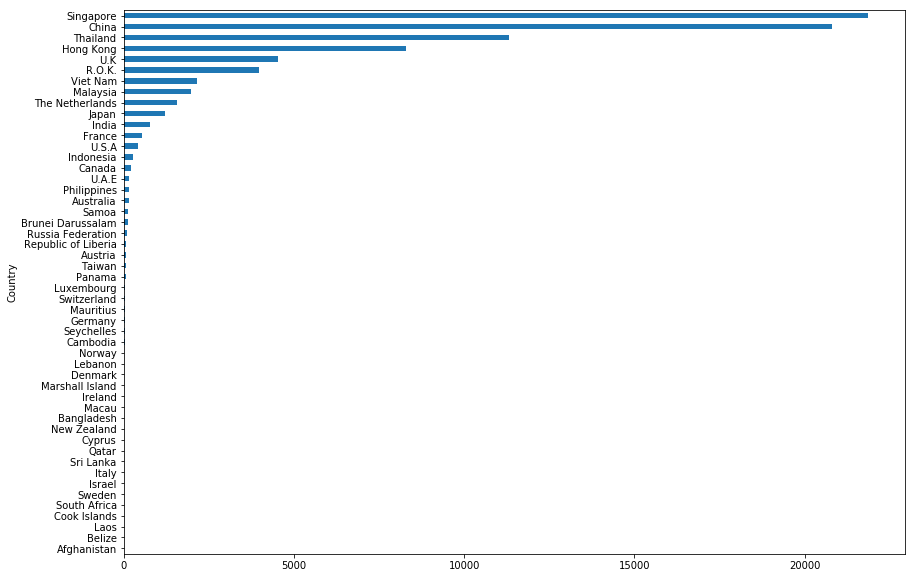

In [55]:
investment_country_year_df['Foreign capital to be brought in'].sort_values(ascending=True) \
                                                                .plot(kind='barh',\
                                                                    figsize=(14, 10))

### Chart: Foreign investment by country over 3 seperate time periods

Total investment by country from 1988 to 2011, 2012 to 2015, and 2016 to 2018
in USD millions


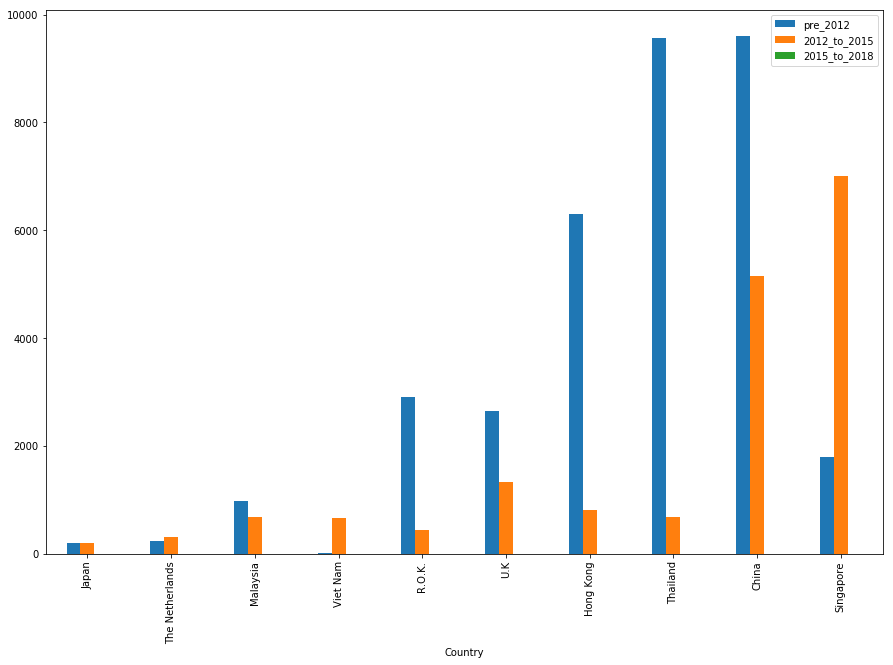

In [57]:
cols_pre_2012 = ['1988-89 to 2010-2011']
cols_2012_to_2015 = ['2011-12','2012-2013','2013-2014','2014-2015']
cols_2015_to_2018 = ['2015-2016','2016-2017','2017-2018','2018 (4-9)','2018-2019 (As of 31/7/2019)']
year_group_col_names = ['pre_2012','2012_to_2015','2015_to_2018']

investment_country_year_grouped_df = pd.DataFrame(columns=year_group_col_names)

investment_country_year_grouped_df['pre_2012'] = investment_country_year_df[cols_pre_2012].sum(axis=1)
investment_country_year_grouped_df['2012_to_2015'] = investment_country_year_df[cols_2012_to_2015].sum(axis=1)
investment_country_year_grouped_df['2015_to_2019'] = investment_country_year_df[cols_2015_to_2018].sum(axis=1)
investment_country_year_grouped_df['total'] = investment_country_year_grouped_df.sum(axis=1)
investment_country_year_grouped_df.sort_values(by='total',ascending=True,inplace=True)

investment_country_year_grouped_df.tail(10)\
    [year_group_col_names].plot(kind='bar',\
                                figsize=(15, 10))

In [58]:

investment_country_year_grouped_df = investment_country_year_grouped_df.transpose()
investment_country_year_grouped_df = investment_country_year_grouped_df.loc[['pre_2012','2012_to_2015','2015_to_2019'],:]

investment_top_5 = investment_country_year_grouped_df.ix[:,-5:]
investment_others = pd.DataFrame(investment_country_year_grouped_df.ix[:,0:-6].sum(axis = 1, skipna = True))
investment_others.rename(columns = {0: "Others"}, inplace=True)
investment_country_year_grouped__top_5_df = investment_top_5.join(investment_others)
investment_country_year_grouped__top_5_df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,U.K,Hong Kong,Thailand,China,Singapore,Others
pre_2012,2659.95,6308.49,9568.09,9596.79,1804.01,3195.148
2012_to_2015,1340.15,814.399,696.051,5145.08,7015.54,2722.893
2015_to_2019,528.299,1160.02,1045.29,6064.66,13081,4661.003


In [59]:
investment_country_year_grouped__top_5_df.to_csv("../../data/investment/investment-country-year/investment_country_year_grouped_top_5_cleaned.csv")

DICA - by sector by year
- [dataset 2011 to Dec 2018 in PDF](https://dica.gov.mm/sites/dica.gov.mm/files/document-files/yearly_sector.pdf)
- [index](https://dica.gov.mm/en/topic/foreign-investment-sector)

Scraped using Tabula
- [CSV of cleaned data](../../data/investment/investment-sector-year/tabula-investment_yearly_sector_cleaned.csv)


In [49]:
investment_sector_year_df = pd.read_csv(\
                    "../../data/investment/investment-sector-year/tabula-investment_yearly_sector_cleaned.csv")
investment_sector_year_df.set_index('Country',inplace=True)


investment_sector_year_df.head(20)

,Foreign capital to be brought in,1988-89 to 2010-2011,2011-12,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018 (4-9),2018-2019 (As of 31/12/2018)
Country,,,,,,,,,,,
Agriculture,405.621,173.101,NaN,9.650,20.269,39.666,7.180,NaN,134.485,10.650,10.620
Livestock and Fisheries,628.990,315.408,NaN,5.600,96.016,26.861,8.250,96.678,27.661,32.955,19.561
Mining,2904.916,2794.463,19.897,15.334,32.730,6.259,28.923,NaN,1.310,6.000,NaN
Manufacturing,10386.054,1738.593,32.254,400.716,1823.882,1502.013,1069.846,1179.514,1769.177,706.677,189.559
Power,21084.852,14523.365,4343.978,364.201,46.511,40.110,360.100,909.883,405.774,92.680,NaN
Oil and Gas,22420.572,13815.375,247.697,309.200,NaN,3220.306,4817.790,NaN,NaN,NaN,10.204
Construction,37.767,37.767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transport and Communication,9785.256,313.272,0.634,NaN,1190.232,1679.304,1930.996,3081.149,901.639,314.158,415.223
Hotel and Tourism,3040.684,1064.811,NaN,300.000,435.210,357.949,288.395,403.646,176.767,9.536,4.370


### Chart: Foreign investment by sector

Total investment by sector from 1988 to 2018
in USD millions


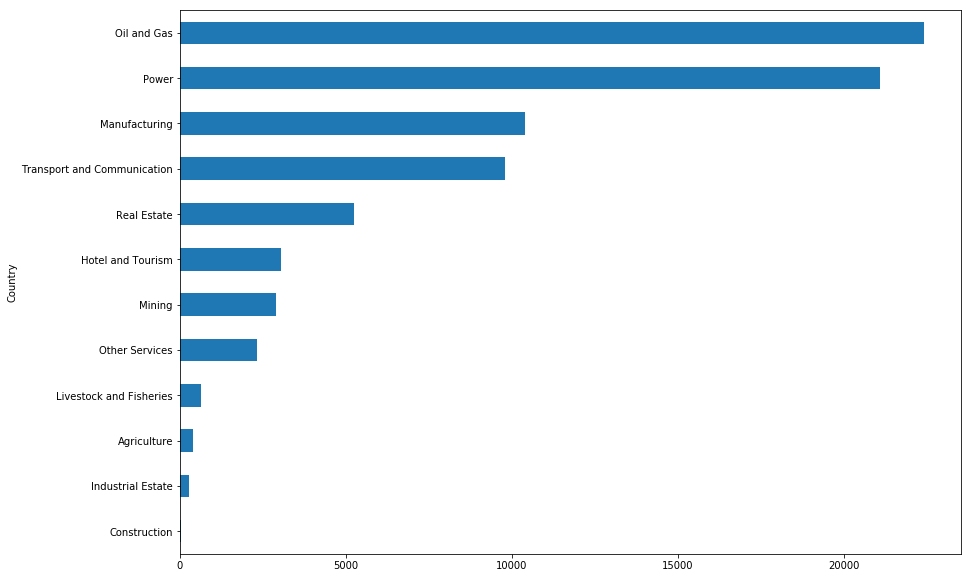

In [50]:
investment_sector_year_df['Foreign capital to be brought in'].sort_values(ascending=True) \
                                                                .plot(kind='barh',\
                                                                    figsize=(14, 10))

### Chart: Foreign investment by sector over 3 seperate time periods

Total investment by sector from 1988 to 2011, 2012 to 2015, and 2016 to 2018
in USD millions


In [51]:

investment_country_sector_grouped_df = pd.DataFrame(columns=year_group_col_names)

investment_country_sector_grouped_df['pre_2012'] = investment_sector_year_df[cols_pre_2012].sum(axis=1)
investment_country_sector_grouped_df['2012_to_2015'] = investment_sector_year_df[cols_2013_to_2015].sum(axis=1)
investment_country_sector_grouped_df['2015_to_2018'] = investment_sector_year_df[cols_2015_to_2018].sum(axis=1)
investment_country_sector_grouped_df['total'] = investment_sector_year_df.sum(axis=1)
investment_country_sector_grouped_df.sort_values(by='total',ascending=True,inplace=True)

investment_country_sector_grouped_df.tail(10)\
    [year_group_col_names].plot(kind='bar',\
                                figsize=(15, 10))

NameError: name 'cols_2013_to_2015' is not defined

#### Debt

Pyidaungsu Hluttaw - Annual Debt Report
- [dataset inside tables in Burmese PDF - debt by country breakdown on pg 25](https://pyidaungsu.hluttaw.mm/uploads/pdf/post/vbB1pC_(10-2018)Annual%20Debt%20Report%20(final).pdf)

[CSV of rough Tabula scrape](../../data/debt/debt_report/tabula-Annual_Debt_Report_(final).csv)

[CSV of exported data](https://docs.google.com/spreadsheets/d/e/2PACX-1vSXx_1j7z_6rSPvq4hkj9mXfT4kwsOOmGtOkp3_YaZJzWqf65yNwDEp6smOfYNnf7q9Xohm4Z3_V6pN/pub?gid=1649083129&single=true&output=csv)


In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSXx_1j7z_6rSPvq4hkj9mXfT4kwsOOmGtOkp3_YaZJzWqf65yNwDEp6smOfYNnf7q9Xohm4Z3_V6pN/pub?gid=1649083129&single=true&output=csv"
s = requests.get(url).content
debt_country_df = pd.read_csv(io.StringIO(s.decode('utf-8')))
debt_country_df.set_index('Name',inplace=True)
for c in ['Value of debt','Amount withdrawn','Amount repaid','Remaining unpaid']:
    debt_country_df[c] = debt_country_df[c].str.replace(',', '')
    debt_country_df[c] = pd.to_numeric(debt_country_df[c], errors='coerce')
    debt_country_df[c].fillna(0,inplace=True)
    debt_country_df[c] = debt_country_df[c].astype(float)


debt_country_df

### Chart: Total Remaining Debt by country
USD Millions

In [ ]:
debt_country_df['Remaining unpaid'].head(20).sort_values(ascending=True) \
        .plot(kind='barh',\
            figsize=(14, 10))

# Viz 2 - Location of investments/projects

Show available locations for foreign investment led projects in:
* Dams
* Mines
* Oil and Gas
* Power

## Data Sources

#### Dams

IFC Report on Hydropower in Myanmar
- [Original source - report and dataset](https://www.ifc.org/wps/wcm/connect/industry_ext_content/ifc_external_corporate_site/hydro+advisory/resources/sea+of+the+hydropower+sector+in+myanmar+resources+page)
- [Republished with geocoding from Open Dev MM](https://opendevelopmentmyanmar.net/dataset/?id=myanmar-dams&search_query=P3R5cGU9ZGF0YXNldCZ0YXhvbm9teT1hbGwmc29ydGluZz1tZXRhZGF0YV9jcmVhdGVkJnF1ZXJ5PQ==)


#### Mines

EITI
- [PDFs and Excel data for MEITI Reports](https://myanmareiti.org/en/publication-category/meiti-reports)

#### Oil and Gas

EITI
- [PDFs and Excel data for MEITI Reports](https://myanmareiti.org/en/publication-category/meiti-reports)

#### Power

Ministry of Electricity and Energy State/Region profiles
* [data on power plants spread across multiple HTML pages](http://www.moee.gov.mm/en/ignite/page/46)

# Viz 3 - Regional development indicators

Show disparaties in regional development through these indicators
* Electrification
* Employment 
* Poverty, deprivation

These indicators are chosen because they are the most directly linkable to investment projects. We want to counter the govt's line that investment brings development.

## Data Sources

#### Electrification
Ministry of Electricity and Energy State/Region profiles
* [data on power plants spread across multiple HTML pages](http://www.moee.gov.mm/en/ignite/page/46)

#### Employment
2014 Census data on labor
* [PDF of thematic report on labor force - contains aggregated tables](https://myanmar.unfpa.org/en/publications/thematic-report-labour-force)
* [REDATUM Online tool to extract census data](http://www.dopredatam.gov.mm/)

#### Poverty, Deprivation
World Bank - Multidimensional Welfare in Myanmar Report
* [PDF Report](http://documents.worldbank.org/curated/en/593661543241844346/Main-Report)

The WB report does not provide the raw data - but it is all derived from census data. We can look at the criteria that they consider constitutes deprivation to recalculate using census data



# Viz 4 - Conflict and land seizures

Show that locations of conflicts and armed groups are usually in areas where investment projects are located
* Locations of conflict
* Locations of armed groups

Show that we are at the precipice of an even more precarious situation for land seisures with the new VFV law
* VFV and potential for land seizures (contestation of land) 

## Data Sources

#### Locations of conflict

Data from ACLED and TAF
* [Google Drive folder of Eva's analysis](https://drive.google.com/open?id=1eNEPWvPH1llhbKQdAfNIj1ecpwOb1FqZ)
* [Original ACLED Source](https://www.acleddata.com/data/)

MIPS Annual Peace and Security Review
* [PDF Report](http://mips-mm.org/annual-peace-security-review-2018/)


#### Locations of armed groups

Asia Foundation's Contested Areas of Myanmar Report
* [PDF Report - map on pg 27](https://asiafoundation.org/publication/contested-areas-myanmar-subnational-conflict-aid-development/) - note: this does not include militias or border guard forces

#### VFV and potential for land seizures (contestation of land) 

Mekong Regional Land Governance - Large-Scale Land Acquisitions for Agricultural Development in Myanmar: A Review of Past and Current Processes Report
* [PDF Report contains state/region level data - table 4 on pg 40](https://mrlg.org/resources/large-scale-land-acquisitions-for-agricultural-development-in-myanmar-a-review-of-past-and-current-processes/)

GAD's Township profiles has township level land use data
* [PDFs of township profiles collected by MIMU](http://themimu.info/township-profiles)


